# Baseline Modeling For MPG Forecasting

Baseline modeling serves as the foundation for evaluating the performance of more complex models. In this phase, we apply a simple Linear Regression model to understand the basic relationship between the vehicle features and miles per gallon (MPG). While this approach assumes linearity and minimal feature interaction, it provides a quick and interpretable benchmark to compare against advanced modeling techniques later in the pipeline.

<br>

**About Linear Regression**<br><br>
Linear regression is a fundamental statistical technique used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The goal of linear regression is to find the best-fitting straight line (also called the regression line) that predicts the value of the dependent variable based on the input features. It helps us understand how changes in predictors influence the outcome and can be used for forecasting and decision-making.<br><br>

## Dataset
seaborn built in dataset `mpg` is used for this modeling.<br><br>

## Tasks
- Import Libraries
- Load and Prepare Dataset for Modeling
    - Split Dataset into Features and Target
    - Split Dataset into Training and Testing Sets
- Train Model
- Apply Model to Make Prediction
- Evaluate Model Performance
- Summarize Model Evaluation
-  Visualize Model Prediction

# Import Libraries

In [1]:
# data preprocessing and model training script
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# model and evaluation libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# visualization libraries
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Load and Prepare Data For Modeling

## Load data

In [2]:
# load preprocessed dataset of mpg
df  = pd.read_csv("output/mpg_cleaned.csv")

## Split the dataset into input features (x) and target variable (y)

In [3]:
# features
x = df.drop('mpg', axis=1)

# target variable
y = df['mpg']

In [4]:
# features
x

,cylinders,horsepower,weight,car_age,origin_japan,origin_usa
0,8,130.0,3504,55,False,True
1,8,165.0,3693,55,False,True
2,8,150.0,3436,55,False,True
3,8,150.0,3433,55,False,True
4,8,140.0,3449,55,False,True
...,...,...,...,...,...,...
387,4,86.0,2790,43,False,True
388,4,52.0,2130,43,False,False
389,4,84.0,2295,43,False,True
390,4,79.0,2625,43,False,True


In [5]:
# target variable
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

## Split the dataset into training and testing sets

In [6]:
# split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression Model

## Training the model

In [7]:
# create create and train linear regression model
model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

LinearRegression()

## Apply model to make predictions

In [8]:
# applying the model to make predictions on the training set
y_train_pred = model.predict(x_train)

# applying the model to make predictions on the test set
y_test_pred = model.predict(x_test)

## Evaluation of The Model Performance

In [9]:
# calculate model performance metrics for training and test set predictions
def evaluate_performance(actual, predictions):
    mse = mean_squared_error(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predictions)
    
    return mse, mae, rmse, r2

In [10]:
# model performance for training set
train_mse, train_mae, train_rmse, train_r2 = evaluate_performance(y_train, y_train_pred)

# model performance for test set
test_mse, test_mae, test_rmse, test_r2 = evaluate_performance(y_test, y_test_pred)

<h3>Separate Evaluations</h3>

**Model Performance for Training Set**
```python
# calculate the mean squared error for training set predictions
train_mse = mean_squared_error(y_train, y_train_pred)

# calculate the mean absolute error for test set predictions
train_mae = mean_absolute_error(y_train, y_train_pred)

# calculate the root mean squared error for training set predictions
train_rmse = np.sqrt(train_mse)

# calculate the R-squared score for training set predictions
train_r2 = r2_score(y_train, y_train_pred)
```

<br>

**Model Performance for Test Set**
```python
# calculate the mean squared error for test set predictions
test_mse = mean_squared_error(y_test, y_test_pred)

# calculate the mean absolute error for test set predictions
test_mae = mean_absolute_error(y_test, y_test_pred)

# calculate the root mean squared error for training set predictions
test_rmse = np.sqrt(test_mse)

# calculate the R-squared score for test set predictions
test_r2 = r2_score(y_test, y_test_pred)
```

## Summarize model evaluation metrics for training and testing sets

In [11]:
# model performance metrics
lr_model = pd.DataFrame({
    "Model" : ["Linear Regression"],
    "Train MSE" : [train_mse],
    "Test MSE" : [test_mse],
    "Train MAE" : [train_mae],
    "Test MAE" : [test_mae],
    "Train RMSE" : [train_rmse],
    "Test RMSE" : [test_rmse],
    "Train R2 Score" : [train_r2],
    "Test R2 Score" : [test_r2]
}).round(5)

In [12]:
# display model performance metrics
lr_model

,Model,Train MSE,Test MSE,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2 Score,Test R2 Score
0,Linear Regression,10.98636,11.23786,2.53207,2.51883,3.31457,3.35229,0.82589,0.77982


# Visualization of model prediction

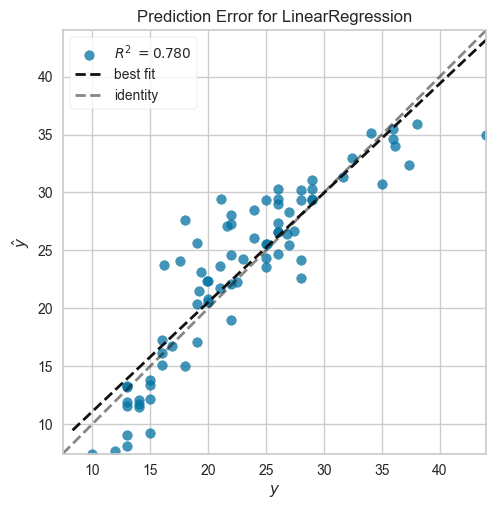

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
# Prediction Error Plot
visualizer = PredictionError(model)

# train visualization object
visualizer.fit(x_train, y_train)

# test visualization object
visualizer.score(x_test, y_test)

# show the plot
visualizer.show()

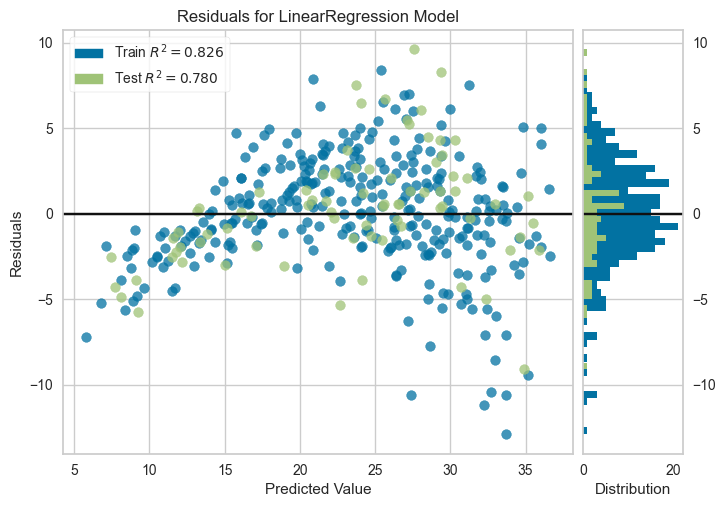

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
# residuals plot
visualizer = ResidualsPlot(model)

# train visualization object
visualizer.fit(x_train, y_train)

# test visualization object
visualizer.score(x_test, y_test)

# show the plot
visualizer.show()